### Name Entity From Capital Letter Words

In [3]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

#### Capital Letter Word And Lower Letter Word

In [2]:
folder_name = "Italian"

In [4]:
df = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Capital/Not_Apply_Lower_Word_Merge_Result.csv") # Not apply lower technique
df

,word,frequency
0,di,13440299
1,che,12844913
2,e,11832597
3,un,8356940
4,non,8106108
...,...,...
746591,MoiraN,2
746592,Moir,2
746593,Southbend,2
746594,SCAPPO,2


In [5]:
df = df[df.iloc[:,1]>=5]
df

,word,frequency
0,di,13440299
1,che,12844913
2,e,11832597
3,un,8356940
4,non,8106108
...,...,...
427614,Lerbier,5
427615,squittenti,5
427616,Lamell,5
427617,chiamatoilmedico,5


In [6]:
def word_length(var):
    var = str(var)
    if len(var) <= 15:
        return var
    else:
        return "word is bigger than adjust value"

In [7]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [8]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,di
1,che
2,e
3,un
4,non
...,...
424514,cesar
424515,Lerbier
424516,squittenti
424517,Lamell


In [9]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [10]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,Non
1,E
2,No
3,Ma
4,Mi
...,...
216968,Hitotsubashi
216969,Presenziate
216970,Maccoll
216971,Lerbier


In [11]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,non
1,e
2,no
3,ma
4,mi
...,...
216968,hitotsubashi
216969,presenziate
216970,maccoll
216971,lerbier


In [12]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,di
1,che
2,e
3,un
4,non
...,...
207541,daebak
207542,sprigionera
207543,cesar
207544,squittenti


In [13]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,di
1,che
2,e
3,un
4,non
...,...
207541,daebak
207542,sprigionera
207543,cesar
207544,squittenti


In [14]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [15]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [16]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set)) # compare capital letter word and lower letter word
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,verax
1,mikhal
2,kathy
3,rosenzweig
4,shuai
...,...
106232,esponila
106233,fahid
106234,demma
106235,whammy


In [17]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [18]:
df_all_capital.to_excel("All_Time_Capital_Letter_Words.xlsx", sheet_name="Word", index=False)

#### Sentence First Word Analysis

In [19]:
df_sent = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Sentence/Merge/Sentence_Merge.csv") # Sentence Merge Result
df_sent

,sentence,frequency
0,no,954832
1,si,592282
2,sì,455004
3,ok,444581
4,grazie,407126
...,...,...
6636500,al guarda qui,3
6636501,alexis lo ha ucciso per salvare jonathan,3
6636502,alex gli voleva bene come a un padre,3
6636503,april nel mio cuore nel profondo io ti amo,3


In [20]:
#df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [21]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i, re.UNICODE)
    first_words.append(words[0])

In [22]:
first_ser = pd.Series(first_words)
first_ser

0              no
1              si
2              sì
3              ok
4          grazie
            ...  
6636500        al
6636501    alexis
6636502      alex
6636503     april
6636504        ho
Length: 6636505, dtype: object

In [23]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,non,441140
1,e,423068
2,ma,143040
3,mi,120011
4,la,116177
...,...,...
134522,hounslow,1
134523,hounds,1
134524,humus,1
134525,huskeroo,1


In [24]:
set_first = set(df_first.iloc[:,0])

In [25]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [26]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # Capital letter word and first sentence word
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,mikhal
1,shuai
2,rosenzweig
3,hubrok
4,moolsan
...,...
65961,fahid
65962,demma
65963,bibolo
65964,cormorant


In [27]:
df_all_spec.to_excel("Special_Name_Exactly_Full.xlsx", sheet_name="Spec_Name", index=False)

#### Spec Name Knee Point

In [28]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # for frequency
df_word

,word,frequency
0,e,17674355
1,non,14565060
2,che,14355207
3,di,13837236
4,un,9088369
...,...,...
293689,drizzarsi,5
293690,manoukian,5
293691,taggarla,5
293692,drizzarlo,5


In [29]:
df_all_spec_freq = pd.merge(df_word, df_all_spec, how="inner", on="word") # frequency value
df_all_spec_freq

,word,frequency
0,talin,2804
1,ailish,2593
2,onizuka,2228
3,guel,1828
4,blackmamba,1667
...,...,...
60177,hcm,5
60178,hcua,5
60179,hcv,5
60180,angke,5


In [30]:
total_freq_spec = df_all_spec_freq.iloc[:,1].sum()
total_freq_spec

1168174

In [31]:
df_all_spec_freq["ratio"] = round(((df_all_spec_freq.iloc[:,1]/total_freq_spec)*100),7)
df_all_spec_freq

,word,frequency,ratio
0,talin,2804,0.240033
1,ailish,2593,0.221970
2,onizuka,2228,0.190725
3,guel,1828,0.156483
4,blackmamba,1667,0.142701
...,...,...,...
60177,hcm,5,0.000428
60178,hcua,5,0.000428
60179,hcv,5,0.000428
60180,angke,5,0.000428


In [32]:
df_all_spec_freq["cumul_ratio"] = np.cumsum(df_all_spec_freq.iloc[:,2])
df_all_spec_freq

,word,frequency,ratio,cumul_ratio
0,talin,2804,0.240033,0.240033
1,ailish,2593,0.221970,0.462003
2,onizuka,2228,0.190725,0.652728
3,guel,1828,0.156483,0.809212
4,blackmamba,1667,0.142701,0.951913
...,...,...,...,...
60177,hcm,5,0.000428,99.997550
60178,hcua,5,0.000428,99.997978
60179,hcv,5,0.000428,99.998406
60180,angke,5,0.000428,99.998834


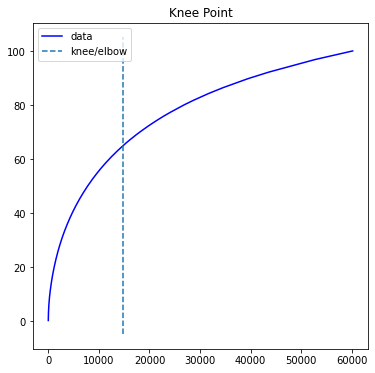

In [33]:
spec_kneedle = KneeLocator(x=df_all_spec_freq.cumul_ratio.index, y=df_all_spec_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
spec_kneedle.plot_knee()

In [34]:
print(round(spec_kneedle.knee_y))

65


In [35]:
knee_point_spec = round(spec_kneedle.knee_y)

In [36]:
df_spec_knee = df_all_spec_freq[df_all_spec_freq.cumul_ratio <= knee_point_spec]
df_spec_knee

,word,frequency,ratio,cumul_ratio
0,talin,2804,0.240033,0.240033
1,ailish,2593,0.221970,0.462003
2,onizuka,2228,0.190725,0.652728
3,guel,1828,0.156483,0.809212
4,blackmamba,1667,0.142701,0.951913
...,...,...,...,...
14811,ojone,20,0.001712,64.992146
14812,francuzzi,20,0.001712,64.993858
14813,franek,20,0.001712,64.995570
14814,diekmen,20,0.001712,64.997282


In [37]:
df_spec_knee.to_excel("Special_Name_Exactly_Knee.xlsx", sheet_name="Spec_Name", index=False)

#### First 100 000 Word And Spec Name Analysis

In [38]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # Word Merge Result
df_word = df_word.head(100000)
df_word

,word,frequency
0,e,17674355
1,non,14565060
2,che,14355207
3,di,13837236
4,un,9088369
...,...,...
99995,gurgler,59
99996,trasferiresti,59
99997,cibato,59
99998,sinis,59


In [39]:
set_word = set(df_word.iloc[:,0])

In [40]:
set_spec_knee = set(df_spec_knee.iloc[:,0])

In [41]:
df_word_spec = pd.DataFrame(set_word.intersection(set_spec_knee))
df_word_spec.rename(columns={0:"word"}, inplace=True)
df_word_spec

,word
0,harbach
1,tenderloin
2,termopili
3,vanzetti
4,kuala
...,...
3131,bormann
3132,borstein
3133,amg
3134,verger


In [42]:
df_word_spec.to_excel("Special_Name_In_Adjust_Word.xlsx", sheet_name="Spec_Name", index=False)